
## Exploratory Data analysis

### Introduction

What it is EDA?

EDA it is the process of analyzing and understanding a dataset before applying models or drawing conclusion.

What do we usually do in EDA?

-Look at basic info


-Summary statistics



-Check distributions


-Spot outliers


-Explore relationships


-Check for data quality issues




### About the dataset

IRIS DATASET


The Iris dataset, introduced by Ronald Fisher in 1936, is a classic multiclass dataset used for classification tasks.

It contains 150 samples from three species of flowers (Iris setosa, Iris virginica, and Iris versicolor), with four features:

1. Sepal length



2. Sepal width



3. Petal length



4. Petal width









![IRIS](irisimagen.png)


#### 1. Initialization and data preparation

1.1 Imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1.2 Initial Settings

In [27]:
#  Set the style of plt

plt.style.use('dark_background')

#### 2.  Loading and Preprocessing the Dataset

2.1 Data Reading

In [28]:
df = pd.read_csv('C:/Users/Dilson/Desktop/iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


2.2 Preprocessing

In [29]:
# Rename variables to improve clarity and understanding.
df.rename(
    { 'SepalLengthCm': 'sep_l', 
     'SepalWidthCm': 'sep_a', 
     'PetalLengthCm': 'pet_l', 
     'PetalWidthCm': 'pet_a', 
    }, axis=1, inplace=True
)

In [30]:
df.head()

,Id,sep_l,sep_a,pet_l,pet_a,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 3.  Cleaning

In [31]:
#Remove the id column 
df.drop('Id', axis=1, inplace= True)
df.head()

,sep_l,sep_a,pet_l,pet_a,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Identify Null values
df.isnull().sum()

sep_l      0
sep_a      0
pet_l      0
pet_a      0
Species    0
dtype: int64

#### 4. Descriptive Analysis

In [33]:
# View statistical information about the dataset
df.describe()

,sep_l,sep_a,pet_l,pet_a
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
#How many columns and rows the dataset has
df.shape

(150, 5)

In [35]:
#View general information, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_l    150 non-null    float64
 1   sep_a    150 non-null    float64
 2   pet_l    150 non-null    float64
 3   pet_a    150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
# Count of the target variable
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\Dilson\AppData\Local\Temp\ipykernel_2896\161280773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Species', palette= colors)


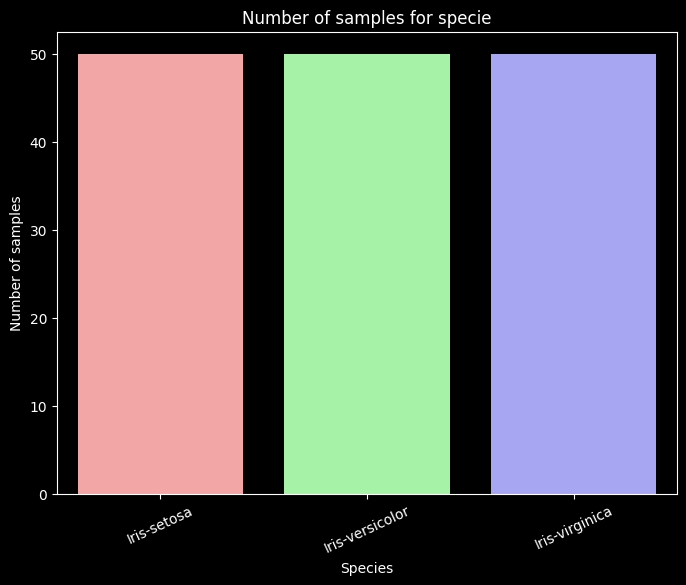

In [37]:
# Configure the figure
plt.figure(figsize=(8, 6))
colors = ['#FF9999', '#99FF99', '#9999FF']
# Creating the plot
sns.countplot(data=df, x='Species', palette= colors)
plt.ylabel('Number of samples')
plt.title('Number of samples for specie')
plt.xticks(rotation=25)
plt.show()

#### 5. Univariate Analysis

This type of analysis refers to the exploration of a single variable, typically to understand its distribution, measures of central tendency (mean, median), and dispersion (standard deviation).

5.1. Sepal length





Text(0, 0.5, 'Frequency')

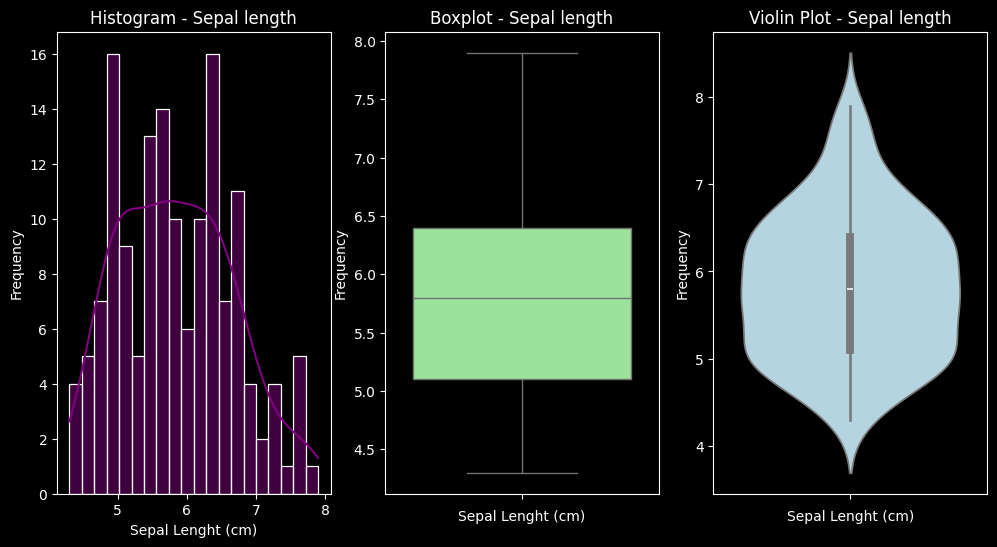

In [38]:
# Config
plt.figure(figsize=(12,6))

# 1.Histogram
plt.subplot(1,3,1)
sns.histplot(df['sep_l'], kde= True, bins= 20, color='purple')
plt.title('Histogram - Sepal length')
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Frequency')

# 2.BoxPlot
plt.subplot(1,3,2)
sns.boxplot(df['sep_l'], color='lightgreen')
plt.title('Boxplot - Sepal length')
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Frequency')

# 3.Violin plot
plt.subplot(1,3,3)
sns.violinplot(df['sep_l'], color='lightblue')
plt.title('Violin Plot - Sepal length')
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Frequency')

5.2. Sepal width





Text(0, 0.5, 'Frequency')

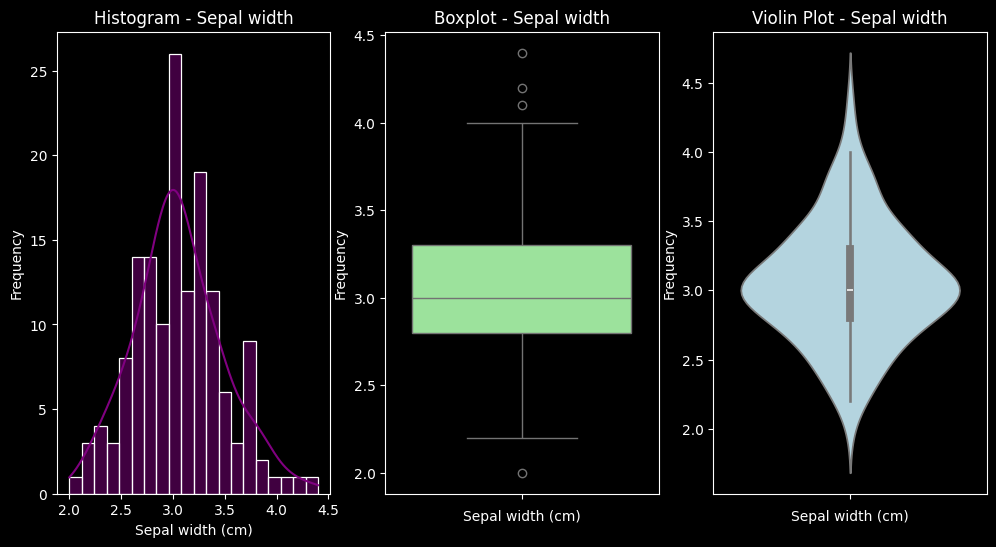

In [ ]:
# Figure config
plt.figure(figsize=(12,6))

# 1.Histogram
plt.subplot(1,3,1)
sns.histplot(df['sep_a'], kde= True, bins= 20, color='purple')
plt.title('Histogram - Sepal width')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Frequency')

# 2.BoxPlot
plt.subplot(1,3,2)
sns.boxplot(df['sep_a'], color='lightgreen')
plt.title('Boxplot - Sepal width')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Frequency')

# 3.Violin plot
plt.subplot(1,3,3)
sns.violinplot(df['sep_a'], color='lightblue')
plt.title('Violin Plot - Sepal width')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Frequency')

5.3. Petal length





Text(0, 0.5, 'Frequency')

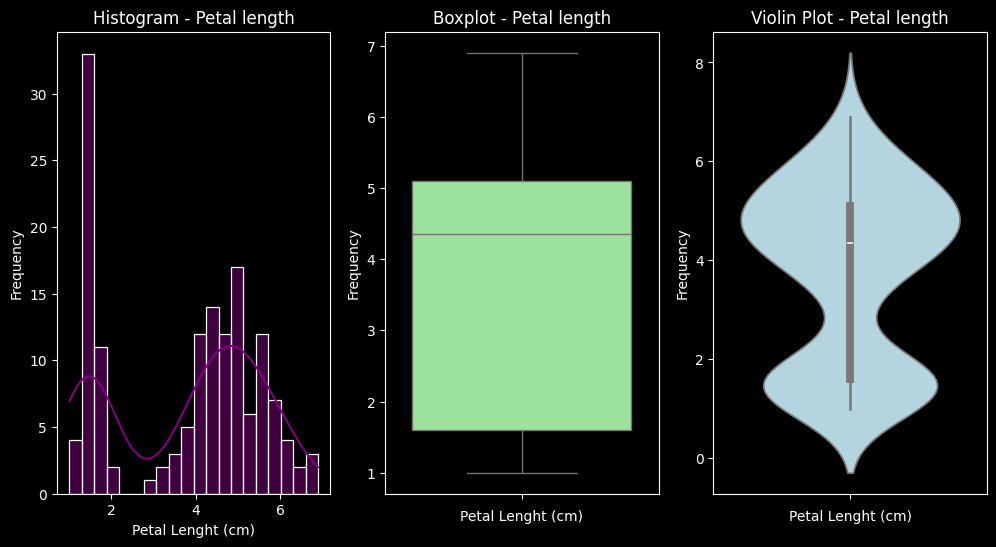

In [40]:
# Config
plt.figure(figsize=(12,6))

# 1.Histogram
plt.subplot(1,3,1)
sns.histplot(df['pet_l'], kde= True, bins= 20, color='purple')
plt.title('Histogram - Petal length')
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Frequency')

# 2.BoxPlot
plt.subplot(1,3,2)
sns.boxplot(df['pet_l'], color='lightgreen')
plt.title('Boxplot - Petal length')
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Frequency')

# 3.Violin plot
plt.subplot(1,3,3)
sns.violinplot(df['pet_l'], color='lightblue')
plt.title('Violin Plot - Petal length')
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Frequency')

5.4. Petal width

Text(0, 0.5, 'Frequency')

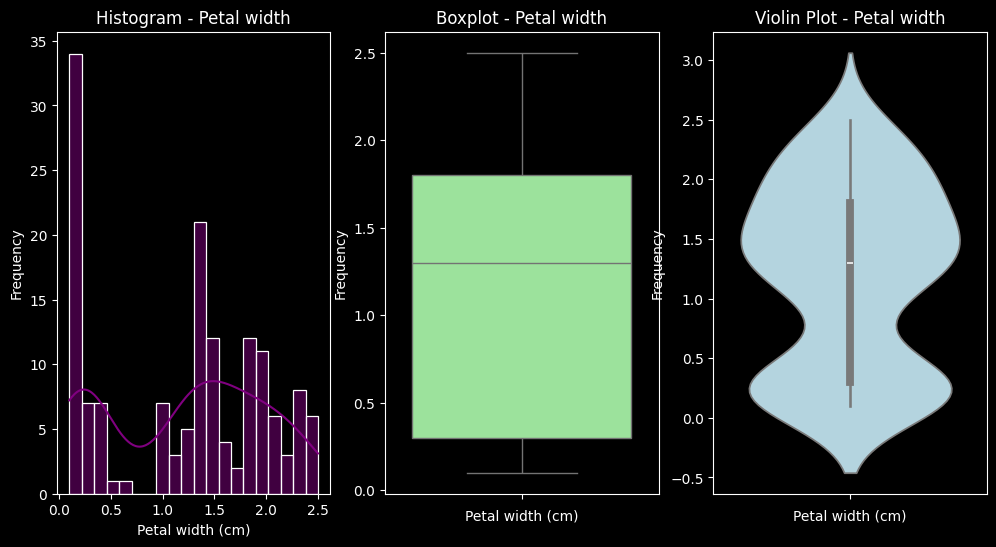

In [41]:
# Config
plt.figure(figsize=(12,6))

# 1.Histogram
plt.subplot(1,3,1)
sns.histplot(df['pet_a'], kde= True, bins= 20, color='purple')
plt.title('Histogram - Petal width')
plt.xlabel('Petal width (cm)')
plt.ylabel('Frequency')

# 2.BoxPlot
plt.subplot(1,3,2)
sns.boxplot(df['pet_a'], color='lightgreen')
plt.title('Boxplot - Petal width')
plt.xlabel('Petal width (cm)')
plt.ylabel('Frequency')

# 3.Violin plot
plt.subplot(1,3,3)
sns.violinplot(df['pet_a'], color='lightblue')
plt.title('Violin Plot - Petal width')
plt.xlabel('Petal width (cm)')
plt.ylabel('Frequency')

#### 6.Multivariate Analysis

6.1 Sepal Length and Species

C:\Users\Dilson\AppData\Local\Temp\ipykernel_2896\2927977327.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Species', y = 'sep_l', palette='Set1',ax=axs[0,1])
C:\Users\Dilson\AppData\Local\Temp\ipykernel_2896\2927977327.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Species', y = 'sep_l', palette='Set1',ax=axs[1,0])


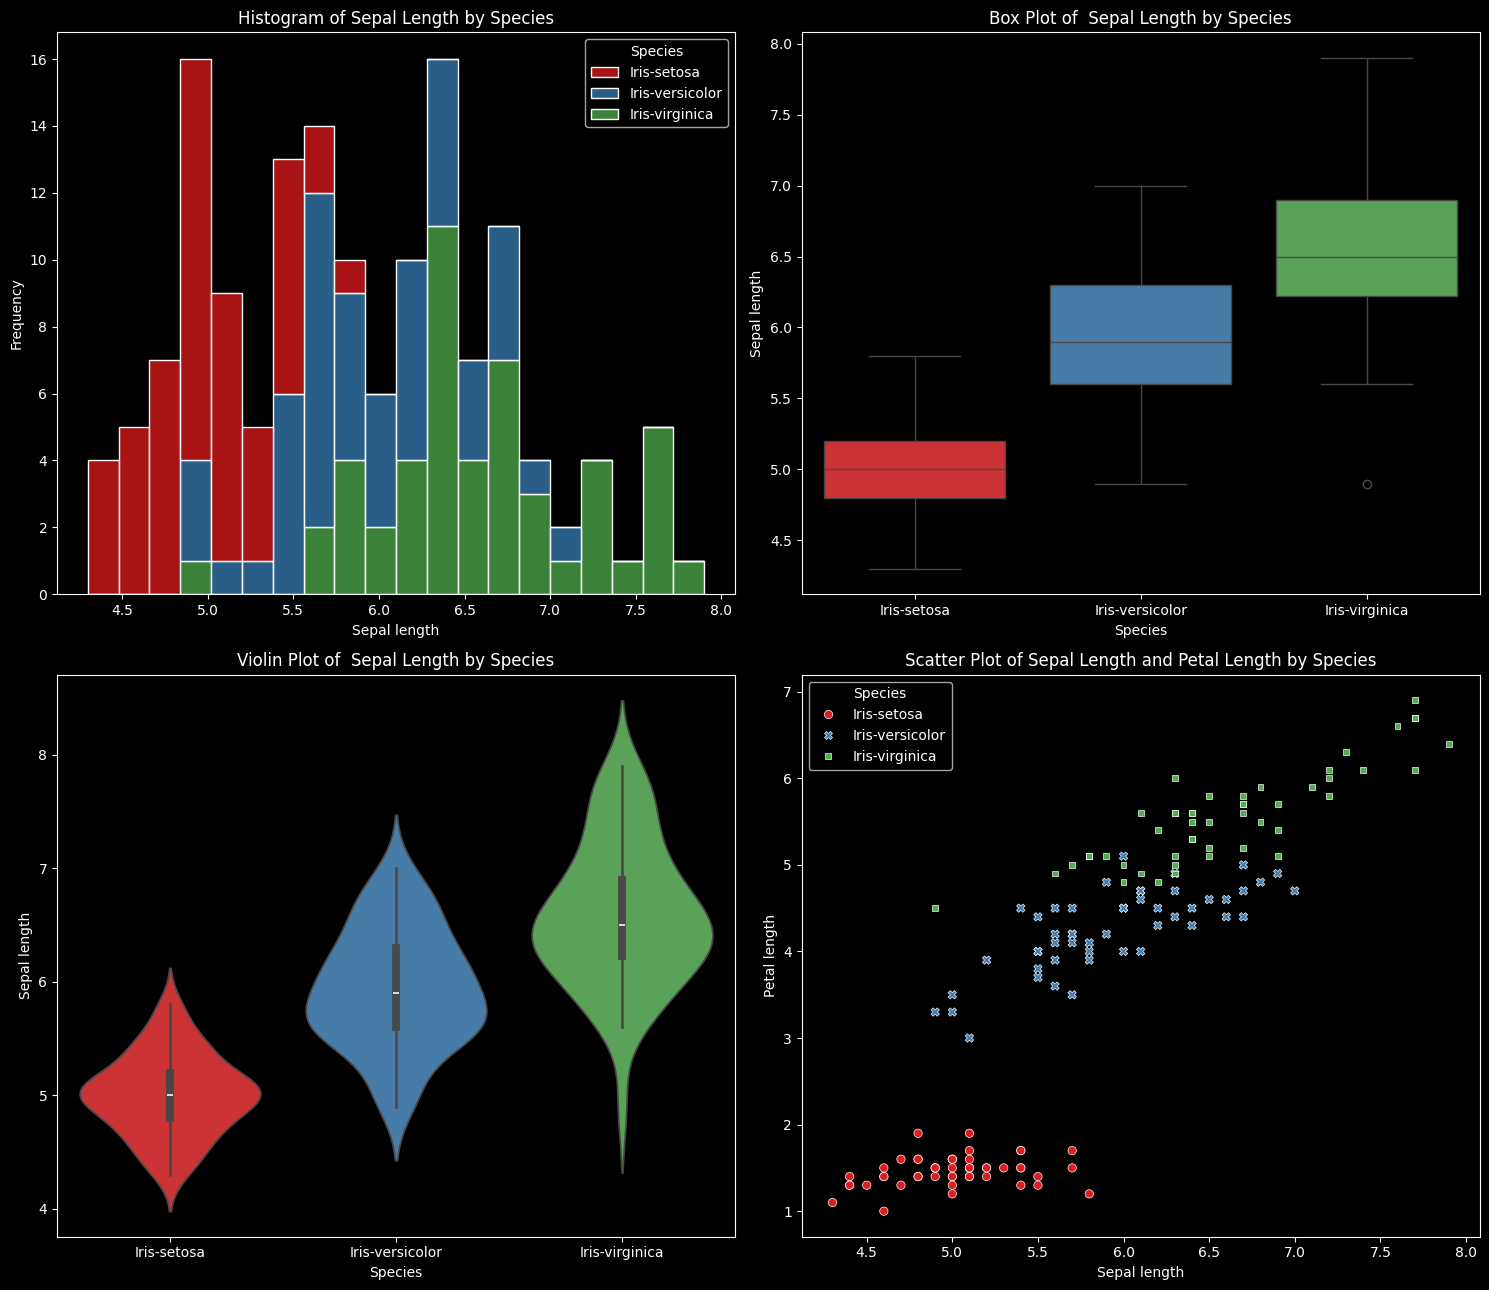

In [42]:
# Figure config
fig, axs = plt.subplots(2,2, figsize= (15,13))

# 1.Histogram 
sns.histplot(data=df, x='sep_l', hue= 'Species', multiple='stack', palette= 'Set1', bins=20, ax=axs[0,0])
axs[0,0].set_title('Histogram of Sepal Length by Species')
axs[0,0].set_xlabel('Sepal length')
axs[0,0].set_ylabel('Frequency')

# 2.Boxplot
sns.boxplot(data=df, x='Species', y = 'sep_l', palette='Set1',ax=axs[0,1])
axs[0,1].set_title('Box Plot of  Sepal Length by Species')
axs[0,1].set_xlabel('Species')
axs[0,1].set_ylabel('Sepal length')

# 3.Violin plot 
sns.violinplot(data=df, x='Species', y = 'sep_l', palette='Set1',ax=axs[1,0])
axs[1,0].set_title('Violin Plot of  Sepal Length by Species')
axs[1,0].set_xlabel('Species')
axs[1,0].set_ylabel('Sepal length')

# 4. Scatter Plot 
sns.scatterplot(data=df, x='sep_l', y='pet_l', palette='Set1',hue='Species',  style='Species', ax=axs[1, 1])
axs[1, 1].set_title('Scatter Plot of Sepal Length and Petal Length by Species')
axs[1, 1].set_xlabel('Sepal length')
axs[1, 1].set_ylabel('Petal length')
axs[1, 1].legend(title='Species')


plt.tight_layout()
plt.show()

6.2 Sepal width and Species

C:\Users\Dilson\AppData\Local\Temp\ipykernel_2896\3960023638.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Species', y = 'sep_a', palette='Set1',ax=axs[0,1])
C:\Users\Dilson\AppData\Local\Temp\ipykernel_2896\3960023638.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Species', y = 'sep_a', palette='Set1',ax=axs[1,0])


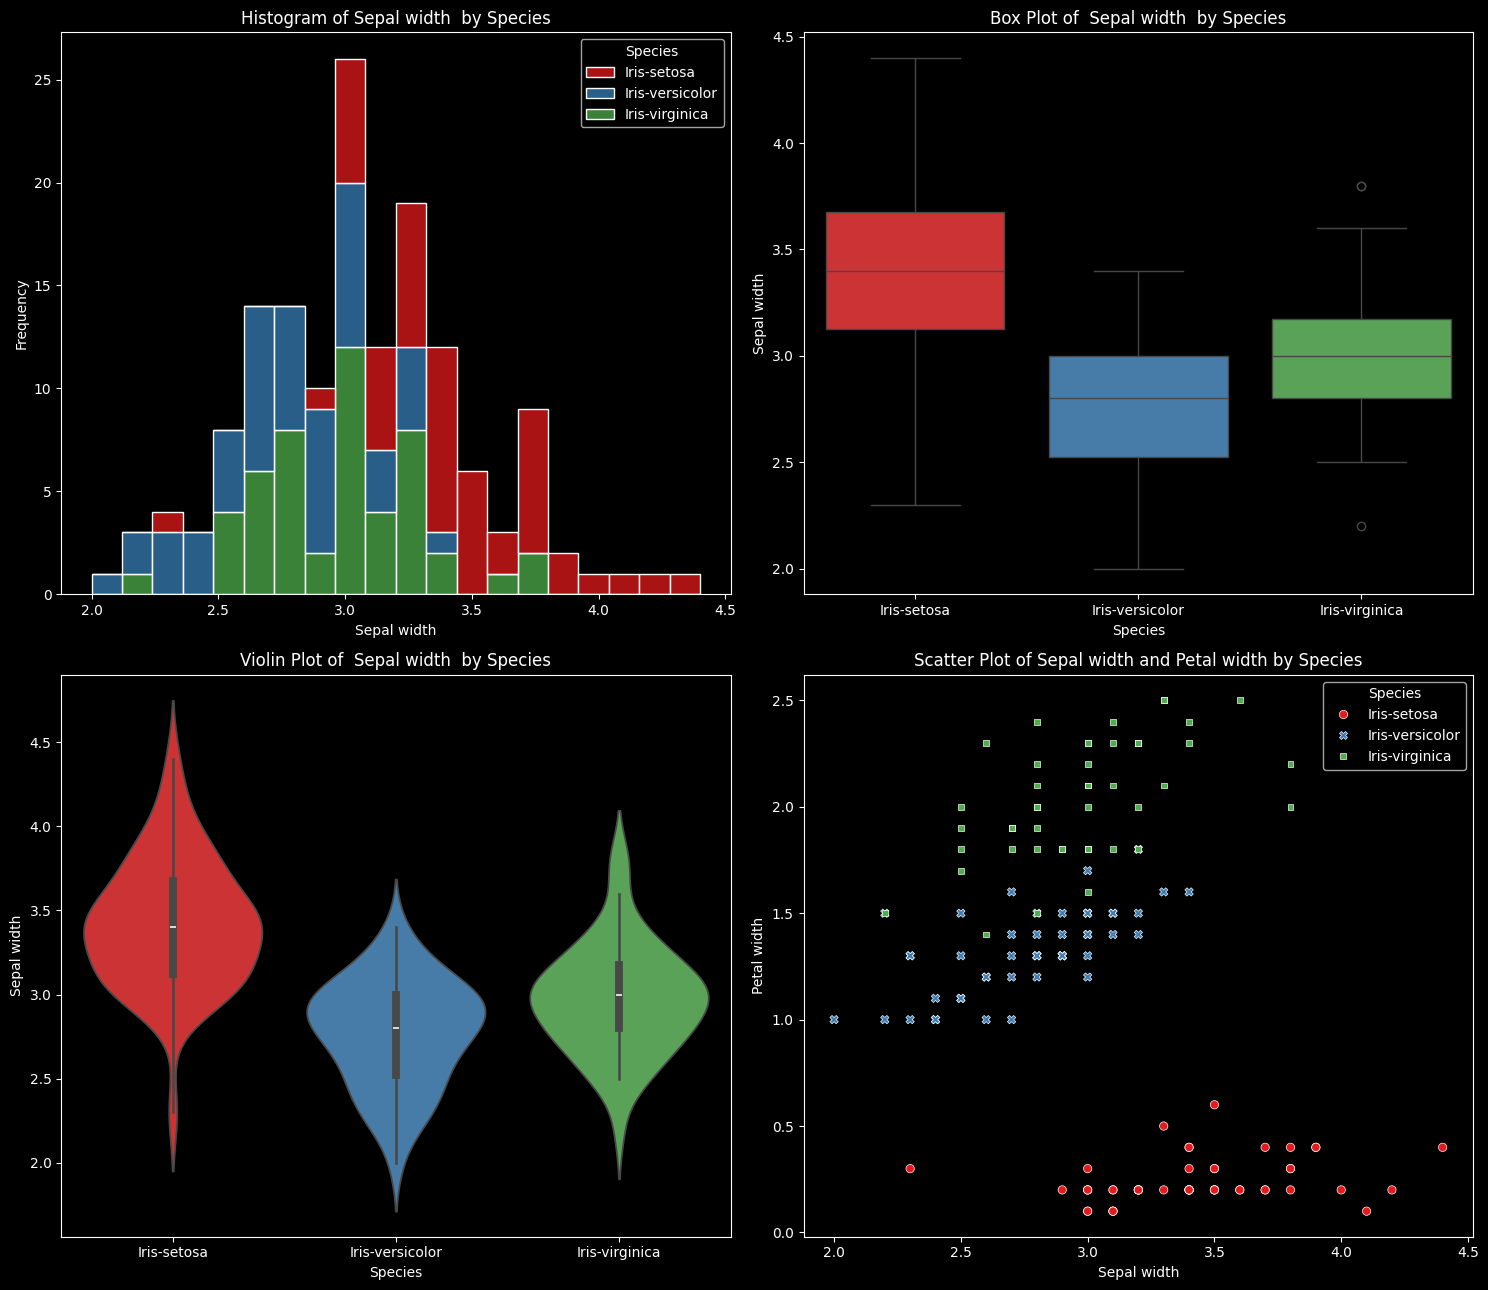

In [43]:
# Figure config
fig, axs = plt.subplots(2,2, figsize= (15,13))

# 1.Histogram 
sns.histplot(data=df, x='sep_a', hue= 'Species', multiple='stack', palette= 'Set1', bins=20, ax=axs[0,0])
axs[0,0].set_title('Histogram of Sepal width  by Species')
axs[0,0].set_xlabel('Sepal width')
axs[0,0].set_ylabel('Frequency')

# 2.Boxplot
sns.boxplot(data=df, x='Species', y = 'sep_a', palette='Set1',ax=axs[0,1])
axs[0,1].set_title('Box Plot of  Sepal width  by Species')
axs[0,1].set_xlabel('Species')
axs[0,1].set_ylabel('Sepal width')

# 3.Violin plot 
sns.violinplot(data=df, x='Species', y = 'sep_a', palette='Set1',ax=axs[1,0])
axs[1,0].set_title('Violin Plot of  Sepal width  by Species')
axs[1,0].set_xlabel('Species')
axs[1,0].set_ylabel('Sepal width')

# 4. Scatter Plot 
sns.scatterplot(data=df, x='sep_a', y='pet_a', palette='Set1',hue='Species',  style='Species', ax=axs[1, 1])
axs[1, 1].set_title('Scatter Plot of Sepal width and Petal width by Species')
axs[1, 1].set_xlabel('Sepal width')
axs[1, 1].set_ylabel('Petal width')
axs[1, 1].legend(title='Species')


plt.tight_layout()
plt.show()

6.3 Relationship Between All Variables

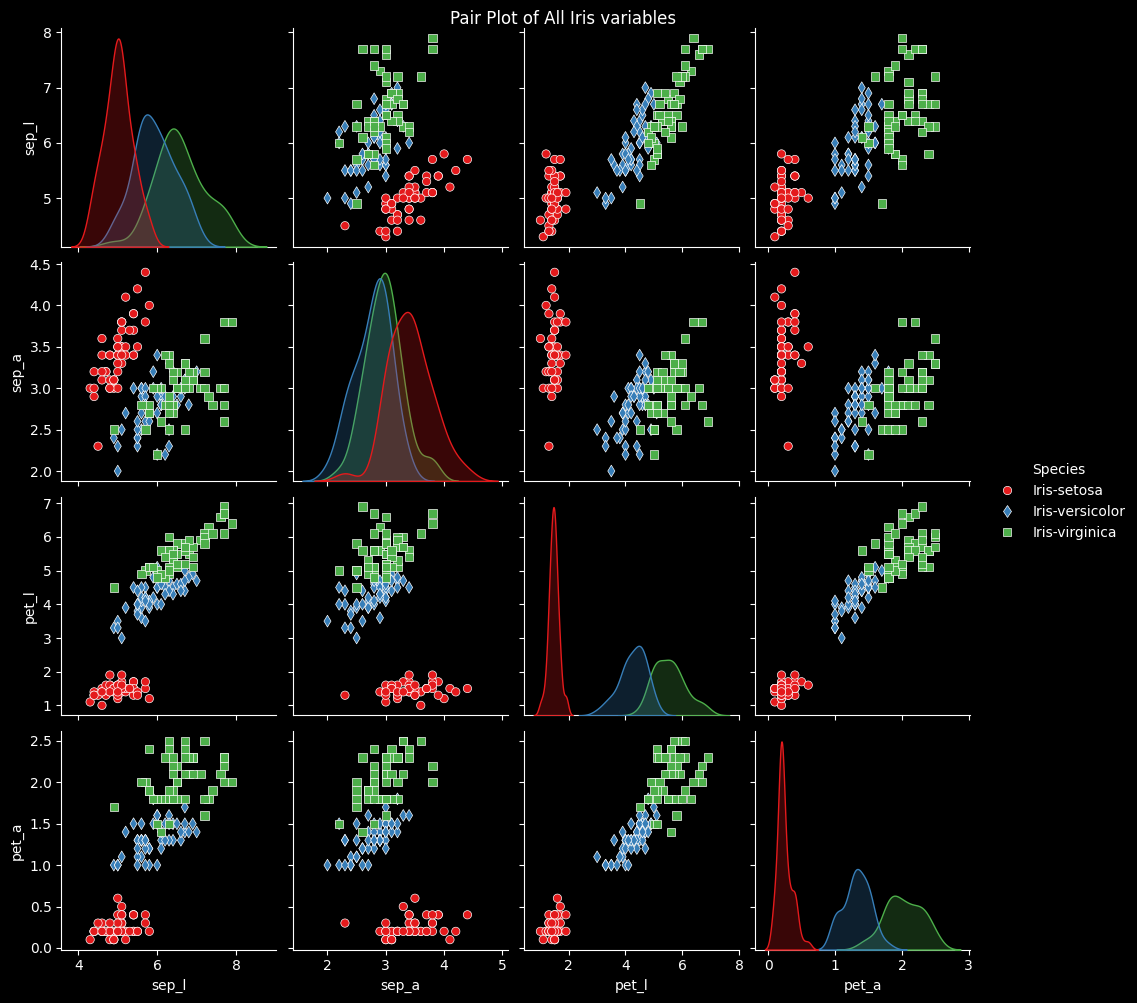

In [44]:
# Pairplot show the relationship between all variables
sns.pairplot(df, hue='Species', markers = ["o", "d", "s"], palette="Set1")
plt.suptitle ('Pair Plot of All Iris variables',y=1)
plt.show()

6.4 Heatmap of Correlation Between Variables

Each square in the heatmap shows the correlation value between two variables (from –1 to 1).

The color intensity shows how strong the correlation is:

Dark red or blue = strong correlation (positive or negative)

Light color or white = weak or no correlation


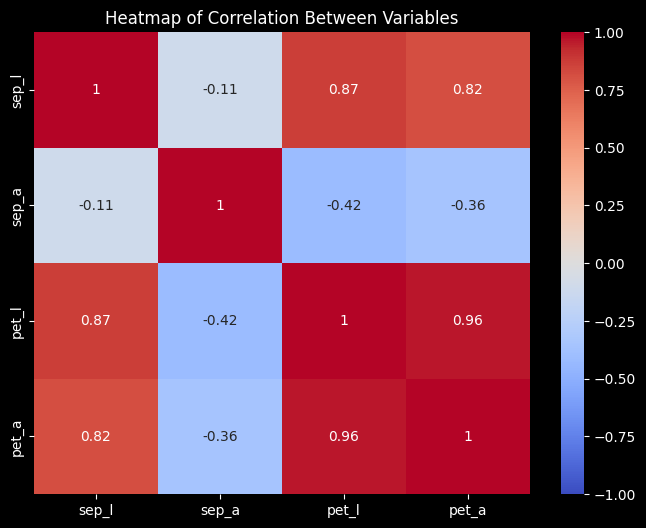

In [45]:
# Heatmap shows the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop('Species',axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Between Variables')
plt.show()

